In [4]:
import pandas as pd
import numpy as np

In [89]:
#Import dataset

data= pd.read_csv("cancer_treatment_data.csv")
data.head(10)

,Patient_ID,Age,Gender,Cancer_Stage,PD-L1_Level,EGFR_Mutation_Count,Tumor_Size,Treatment_Type,Smoking_Status,Response
0,1,62,Male,Stage III,99,8,9.100000,Chemotherapy,Current,Non-Responder
1,2,71,Female,Stage II,92,11,7.800000,Chemotherapy,Never,Responder
2,3,56,NaN,Stage IV,22,8,8.500000,Immunotherapy,Former,Responder
3,4,79,Female,Stage IV,31,3,8.000000,Chemotherapy,Former,Non-Responder
4,5,59,Male,Stage II,10,14,9.800000,Chemotherapy,NaN,Non-Responder
5,6,69,Female,Stage II,65,4,7.800000,Immunotherapy,Former,Non-Responder
6,7,67,Male,Stage IV,95,9,2.900000,Chemotherapy,Former,Responder
7,8,86,Female,Stage IV,4,6,8.100000,Chemotherapy,Current,Responder
8,9,112,Male,Stage II,94,5,8.658840,Immunotherapy,Former,Non-Responder
9,10,90,Male,Stage IV,12,14,22.202153,Chemotherapy,NaN,Responder


# Inspect data Structure

In [92]:
#Check the shape of data
data.shape

(3000, 10)

The dataset consists of 3000 rows and 10 columns.

In [93]:
#Column names and data types
data.dtypes

Patient_ID               int64
Age                      int64
Gender                  object
Cancer_Stage            object
PD-L1_Level              int64
EGFR_Mutation_Count      int64
Tumor_Size             float64
Treatment_Type          object
Smoking_Status          object
Response                object
dtype: object

In [94]:
# Convert the text columns to the string data type
data['Gender'] = data['Gender'].astype("string")
data['Cancer_Stage']= data['Cancer_Stage'].astype("string")
data['Treatment_Type']=data['Treatment_Type'].astype("string")
data['Smoking_Status']=data['Smoking_Status'].astype("string")
data['Response']=data['Response'].astype("string")

In [95]:
data.dtypes

Patient_ID               int64
Age                      int64
Gender                  string
Cancer_Stage            string
PD-L1_Level              int64
EGFR_Mutation_Count      int64
Tumor_Size             float64
Treatment_Type          string
Smoking_Status          string
Response                string
dtype: object

In [96]:
#Round decimals in Tumor_Size to 1 decimal
data['Tumor_Size']=data['Tumor_Size'].round(1)

In [97]:
data.head(5)

,Patient_ID,Age,Gender,Cancer_Stage,PD-L1_Level,EGFR_Mutation_Count,Tumor_Size,Treatment_Type,Smoking_Status,Response
0,1,62,Male,Stage III,99,8,9.1,Chemotherapy,Current,Non-Responder
1,2,71,Female,Stage II,92,11,7.8,Chemotherapy,Never,Responder
2,3,56,<NA>,Stage IV,22,8,8.5,Immunotherapy,Former,Responder
3,4,79,Female,Stage IV,31,3,8.0,Chemotherapy,Former,Non-Responder
4,5,59,Male,Stage II,10,14,9.8,Chemotherapy,<NA>,Non-Responder


In [98]:
#To get summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           3000 non-null   int64  
 1   Age                  3000 non-null   int64  
 2   Gender               2700 non-null   string 
 3   Cancer_Stage         3000 non-null   string 
 4   PD-L1_Level          3000 non-null   int64  
 5   EGFR_Mutation_Count  3000 non-null   int64  
 6   Tumor_Size           3000 non-null   float64
 7   Treatment_Type       3000 non-null   string 
 8   Smoking_Status       2700 non-null   string 
 9   Response             3000 non-null   string 
dtypes: float64(1), int64(4), string(5)
memory usage: 234.5 KB


# Check For Missing Values

In [99]:
#To count missing values in each column
data.isnull().sum()

Patient_ID               0
Age                      0
Gender                 300
Cancer_Stage             0
PD-L1_Level              0
EGFR_Mutation_Count      0
Tumor_Size               0
Treatment_Type           0
Smoking_Status         300
Response                 0
dtype: int64

In [100]:
# Calculate the percentage of missing values for each column
missing_percentage = (data.isnull().mean() * 100).round(2)
missing_percentage

Patient_ID              0.0
Age                     0.0
Gender                 10.0
Cancer_Stage            0.0
PD-L1_Level             0.0
EGFR_Mutation_Count     0.0
Tumor_Size              0.0
Treatment_Type          0.0
Smoking_Status         10.0
Response                0.0
dtype: float64

Here the columns Gender and Smoking_Status have 10% missing values and are important features, we can handle the missing values by filling them with appropriate values.

In [101]:
data.Gender.unique()

<StringArray>
['Male', 'Female', <NA>]
Length: 3, dtype: string

In [102]:
data.Gender.value_counts()

Female    1380
Male      1320
Name: Gender, dtype: Int64

In [107]:
#Fill missing values in Gender by Unknown as there’s no identifiable pattern,
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])


In [108]:
data.head()

,Patient_ID,Age,Gender,Cancer_Stage,PD-L1_Level,EGFR_Mutation_Count,Tumor_Size,Treatment_Type,Smoking_Status,Response
0,1,62,Male,Stage III,99,8,9.1,Chemotherapy,Current,Non-Responder
1,2,71,Female,Stage II,92,11,7.8,Chemotherapy,Never,Responder
2,3,56,Female,Stage IV,22,8,8.5,Immunotherapy,Former,Responder
3,4,79,Female,Stage IV,31,3,8.0,Chemotherapy,Former,Non-Responder
4,5,59,Male,Stage II,10,14,9.8,Chemotherapy,<NA>,Non-Responder


In [109]:
data.isna().sum()

Patient_ID               0
Age                      0
Gender                   0
Cancer_Stage             0
PD-L1_Level              0
EGFR_Mutation_Count      0
Tumor_Size               0
Treatment_Type           0
Smoking_Status         300
Response                 0
dtype: int64

In [17]:
#Fill missing values in Smoking_Status by "Not Specified" as the data was not provided

data['Smoking_Status']= data['Smoking_Status'].fillna('Not Specified')

In [18]:
#To check the count of missing values after filling it

data.isnull().sum()

Patient_ID               0
Age                      0
Gender                 300
Cancer_Stage             0
PD-L1_Level              0
EGFR_Mutation_Count      0
Tumor_Size               0
Treatment_Type           0
Smoking_Status           0
Response                 0
dtype: int64

Now there are no any missing values present in the dataset. 

In [19]:
#To check duplicate values

duplicates= data.duplicated().sum()
duplicates

0

There are no any duplicate values in the dataset.

# Summarize the data

In [20]:
#To summarize the numerical data

data.describe()

,Patient_ID,Age,PD-L1_Level,EGFR_Mutation_Count,Tumor_Size
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,65.819000,49.366333,6.860333,5.805000
std,866.169729,15.704472,29.326862,4.234714,3.270907
min,1.000000,40.000000,0.000000,0.000000,1.000000
25%,750.750000,52.000000,23.000000,3.000000,3.300000
50%,1500.500000,66.000000,49.000000,7.000000,5.600000
75%,2250.250000,79.000000,76.000000,10.000000,7.900000
max,3000.000000,117.000000,99.000000,14.000000,22.200000


In [21]:
data.describe(include='string')

,Gender,Cancer_Stage,Treatment_Type,Smoking_Status,Response
count,2700,3000,3000,3000,3000
unique,2,3,2,4,2
top,Female,Stage III,Chemotherapy,Current,Non-Responder
freq,1380,1023,1517,919,1521


# Detection of Outliers

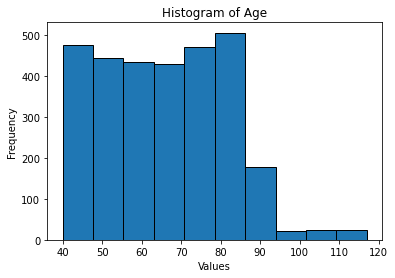

In [22]:
#To check normality of data

import matplotlib.pyplot as plt

plt.hist(data['Age'], bins=10, edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

Since age is not normally distributed, using methods like the Z-score may not be appropriate. Instead, the Interquartile Range (IQR) method is a robust approach for detecting outliers, especially with skewed data.

In [23]:
#To calculate quartiles and IQR

Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1

print(Q1,Q3,IQR)

52.0 79.0 27.0


In [24]:
# Step 2: Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

11.5 119.5


In [25]:
#Identify outliers
outliers = data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]

# Display outliers
if not outliers.empty:
    print("Outliers in Age:")
    print(outliers)
else:
    print("No outliers detected in Age.")

No outliers detected in Age.


Even though a box plot might not show obvious outliers based on statistical methods (like IQR), certain age values in the 117-year-old range may still be considered outliers from a clinical perspective because they fall outside of a typical age range for lung cancer patients.Capping the Age field to a maximum of 95 or 100 reflects a more realistic and medically appropriate range, based on what is commonly observed in this type of dataset.

In [26]:
# Cap the age to a maximum value of 95 or 100
data['Age'] = np.where(data['Age'] > 95, 95, data['Age'])

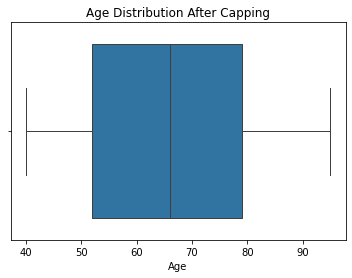

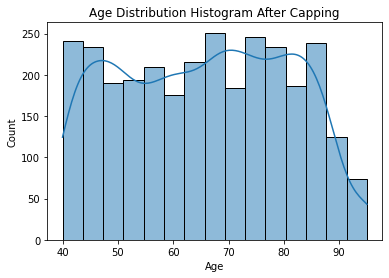

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot age distribution after capping
sns.boxplot(x=data['Age'])
plt.title('Age Distribution After Capping')
plt.show()

sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution Histogram After Capping')
plt.show()

The age data was capped at 95 years, as values above this threshold were deemed unrealistic in the context of the dataset. 

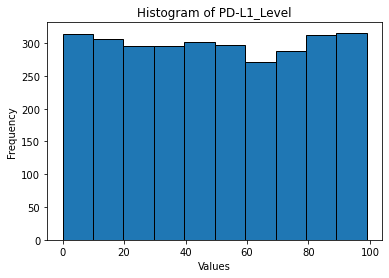

In [28]:
#To check normality of data, PD-L1_Level

import matplotlib.pyplot as plt

plt.hist(data['PD-L1_Level'], bins=10, edgecolor='black')
plt.title('Histogram of PD-L1_Level')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

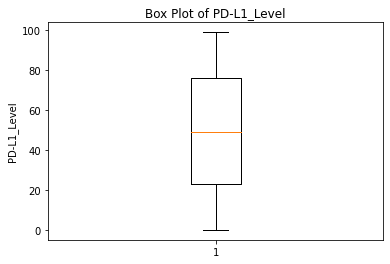

In [29]:
import matplotlib.pyplot as plt

plt.boxplot(data['PD-L1_Level'])
plt.title('Box Plot of PD-L1_Level')
plt.ylabel('PD-L1_Level')
plt.show()


Here PD-L1_Level field has no any outliers.

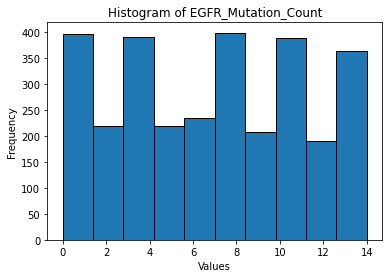

In [30]:
#To check normality of data EGFR_Mutation_Count

import matplotlib.pyplot as plt

plt.hist(data['EGFR_Mutation_Count'], bins=10, edgecolor='black')
plt.title('Histogram of EGFR_Mutation_Count')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

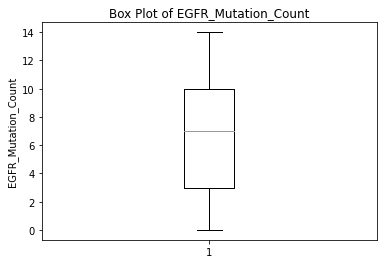

In [31]:
import matplotlib.pyplot as plt

plt.boxplot(data['EGFR_Mutation_Count'])
plt.title('Box Plot of EGFR_Mutation_Count')
plt.ylabel('EGFR_Mutation_Count')
plt.show()

No any outliers detected in EGFR_Mutation_Count.

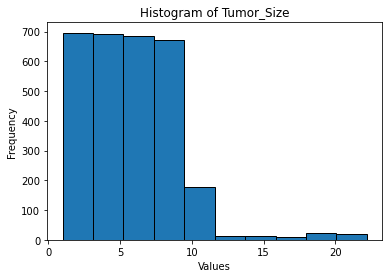

In [32]:
#To check normality of data Tumor_Size

import matplotlib.pyplot as plt

plt.hist(data['Tumor_Size'], bins=10, edgecolor='black')
plt.title('Histogram of Tumor_Size')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [33]:
It is observed that the values are positively skewed.

SyntaxError: invalid syntax (3026165849.py, line 1)

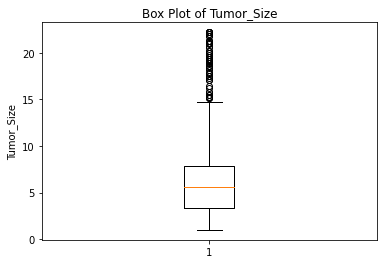

In [47]:

plt.boxplot(data['Tumor_Size'])
plt.title('Box Plot of Tumor_Size')
plt.ylabel('Tumor_Size')
plt.show()

Here their are outliers detected and as from the histogram it is positively skewed data.For reference, in NSCLC, tumors greater than 10 cm are usually considered large and might correspond to later stages (III or IV) of cancer, or could be a rare case.Stage IV cancers (advanced) may involve tumors that are larger than 5 cm, and in some rare cases, the tumor can grow larger than 10 cm.So we cap the values above 10cm.

In [52]:
#Capping the tumor size

data['Tumor_Size'] = np.where(data['Tumor_Size'] > 10, 10, data['Tumor_Size'])


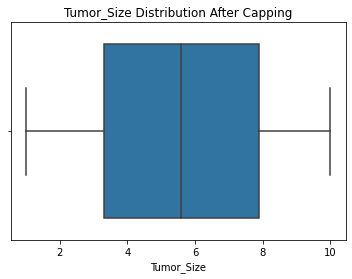

In [55]:

# Plot age distribution after capping
sns.boxplot(x=data['Tumor_Size'])
plt.title('Tumor_Size Distribution After Capping')
plt.show()
